## Library imports

In [13]:
!pip install pythermalcomfort

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 3.3 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Data wrangling

### 2.1. Data Gathering


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_excel("/content/drive/MyDrive/Data/room_data.xlsx")
data.head()

,#,Date-Time (South Korea Standard Time),Ch:1 - Temperature (°C),Ch:2 - RH (%),Dew Point (°C)
0,1,2024-05-08 12:38:46,25.53,46.118164,13.116431
1,2,2024-05-08 12:48:46,25.23,45.922852,12.778805
2,3,2024-05-08 12:58:46,25.19,45.507812,12.603818
3,4,2024-05-08 13:08:46,25.09,43.750000,11.913710
4,5,2024-05-08 13:18:46,25.09,44.702148,12.240919


In [ ]:
data.tail()

,#,Date-Time (South Korea Standard Time),Ch:1 - Temperature (°C),Ch:2 - RH (%),Dew Point (°C)
1869,1870,2024-05-21 12:08:46,26.21,53.466797,16.032336
1870,1871,2024-05-21 12:18:46,26.21,54.516602,16.337649
1871,1872,2024-05-21 12:28:46,26.26,57.397461,17.196460
1872,1873,2024-05-21 12:38:46,26.30,58.789062,17.613638
1873,1874,2024-05-21 12:48:46,26.33,60.278320,18.039681


###2.2. Data assessment

In [ ]:
data.shape

(1874, 5)

In [ ]:
data.describe()

,#,Date-Time (South Korea Standard Time),Ch:1 - Temperature (°C),Ch:2 - RH (%),Dew Point (°C)
count,1874.000000,1874,1874.000000,1874.000000,1874.000000
mean,937.500000,2024-05-15 00:43:46.000000256,25.064007,48.343726,13.304256
min,1.000000,2024-05-08 12:38:46,22.350000,33.007812,7.665724
25%,469.250000,2024-05-11 18:41:16,24.650000,43.603516,11.640804
50%,937.500000,2024-05-15 00:43:46,25.160000,47.631836,13.055531
75%,1405.750000,2024-05-18 06:46:16,25.500000,53.289795,15.421025
max,1874.000000,2024-05-21 12:48:46,26.770000,62.719727,18.236154
std,541.121521,NaN,0.798005,6.247885,2.347144


In [ ]:
# Checking missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   #                                      1874 non-null   int64         
 1   Date-Time (South Korea Standard Time)  1874 non-null   datetime64[ns]
 2   Ch:1 - Temperature   (°C)              1874 non-null   float64       
 3   Ch:2 - RH   (%)                        1874 non-null   float64       
 4   Dew Point   (°C)                       1874 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 73.3 KB


In [ ]:
# Checking duplicates
sum(data.duplicated())

0

### 2.3. Data Cleaning

In [5]:
# replacing column names
data.columns = ['rec_id', 'datetime', 'temperature', 'rel_humidity', 'dew_point']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rec_id        1874 non-null   int64         
 1   datetime      1874 non-null   datetime64[ns]
 2   temperature   1874 non-null   float64       
 3   rel_humidity  1874 non-null   float64       
 4   dew_point     1874 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 73.3 KB


In [ ]:
# Separating date and time
# data['rec_date'] = [value.date() for value in data['datetime']]
# data['rec_time'] = [value.time() for value in data['datetime']]

In [6]:
# Separating date and time
data['rec_date'] = data.datetime.dt.date
data['rec_hour'] = data.datetime.dt.hour
data.head()

,rec_id,datetime,temperature,rel_humidity,dew_point,rec_date,rec_hour
0,1,2024-05-08 12:38:46,25.53,46.118164,13.116431,2024-05-08,12
1,2,2024-05-08 12:48:46,25.23,45.922852,12.778805,2024-05-08,12
2,3,2024-05-08 12:58:46,25.19,45.507812,12.603818,2024-05-08,12
3,4,2024-05-08 13:08:46,25.09,43.750000,11.913710,2024-05-08,13
4,5,2024-05-08 13:18:46,25.09,44.702148,12.240919,2024-05-08,13


In [7]:
# dropping unuseful columns
data.drop(['datetime', 'dew_point'], axis=1, inplace= True)
data.head()

,rec_id,temperature,rel_humidity,rec_date,rec_hour
0,1,25.53,46.118164,2024-05-08,12
1,2,25.23,45.922852,2024-05-08,12
2,3,25.19,45.507812,2024-05-08,12
3,4,25.09,43.750000,2024-05-08,13
4,5,25.09,44.702148,2024-05-08,13


In [8]:
# saving data
data.to_csv('clean_data.csv', index= False)

## 1. Questions

1. How many times was the thermal comfort violated?
2. Which days had the highest violation counts?
3. When did the thermal comfort violation occur mostly in those days (during the day or at night)?
4. What are the ranges of temperatures and relative humidity that provided thermal comfort?



## 3. Exploratory Data Analysis

In [9]:
data = pd.read_csv("clean_data.csv")
data.head()

,rec_id,temperature,rel_humidity,rec_date,rec_hour
0,1,25.53,46.118164,2024-05-08,12
1,2,25.23,45.922852,2024-05-08,12
2,3,25.19,45.507812,2024-05-08,12
3,4,25.09,43.750000,2024-05-08,13
4,5,25.09,44.702148,2024-05-08,13


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rec_id        1874 non-null   int64  
 1   temperature   1874 non-null   float64
 2   rel_humidity  1874 non-null   float64
 3   rec_date      1874 non-null   object 
 4   rec_hour      1874 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 73.3+ KB


### 3.1. Feature engineering

In [ ]:
# data template
model_data = pd.read_csv("/content/drive/MyDrive/Data/pythermalcomfort_template-SI.csv")
model_data.head()

,Air temperature [C],MRT [C],Air speed [m/s],Relative humidity [%],Metabolic rate [met],Clothing level [clo]
0,25,25,0.15,50,1.0,1.0
1,26,25,0.15,50,1.0,1.0
2,27,25,0.15,50,1.0,1.0
3,28,25,0.15,50,1.0,1.0
4,29,25,0.15,50,1.0,1.0


#### Standard reference



The ASHRAE 55 2020 limits are 10 < tdb [°C] < 40, 10 < tr [°C] < 40, 0 < vr [m/s] < 2, 1 < met [met] < 4, and 0 < clo [clo] < 1.5

#### Assumptions

create columns:
- mean radiant temperature (tr) should be the dry bulb temperature plus a random number between 1 and 10 with two decimals.
- air velocity, should be 0.1 plus a random number between 0.05 and 0.5 for a minimum of 0.15 and a maximum of 0.5 m/s
- metabolic rate should be 1 met when reading or seated (time slot: 6-9 or 15-21:59) and 0.7 when sleeping (time slot: 22-5) or outside 10-14:59
- clothing level should be between 0.36 and 0.4 with two decimals

In [10]:
# new features
from random import uniform

data['mr_temperature'] = (data['temperature'] + uniform(1, 10))
data['air_velocity'] = [round(0.1 + uniform(0.05, 0.4),2) for id in data.rec_id]
data['met'] = [(1 if (v >=6 and v <= 9) or (v >=15 and v < 22) else 0.7) for v in data.rec_hour]
data['clo'] = [round(uniform(0.36, 0.4),2) for id in data.rec_id]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rec_id          1874 non-null   int64  
 1   temperature     1874 non-null   float64
 2   rel_humidity    1874 non-null   float64
 3   rec_date        1874 non-null   object 
 4   rec_hour        1874 non-null   int64  
 5   mr_temperature  1874 non-null   float64
 6   air_velocity    1874 non-null   float64
 7   met             1874 non-null   float64
 8   clo             1874 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 131.9+ KB


In [ ]:
data.head()

,rec_id,temperature,rel_humidity,rec_date,rec_hour,mr_temperature,air_velocity,met,clo
0,1,25.53,46.118164,2024-05-08,12,31.066433,0.49,0.7,0.37
1,2,25.23,45.922852,2024-05-08,12,30.766433,0.35,0.7,0.38
2,3,25.19,45.507812,2024-05-08,12,30.726433,0.41,0.7,0.36
3,4,25.09,43.750000,2024-05-08,13,30.626433,0.40,0.7,0.38
4,5,25.09,44.702148,2024-05-08,13,30.626433,0.49,0.7,0.40


In [11]:
# reodering columns as wanted
data = data[['rec_id', 'rec_date', 'rec_hour', 'temperature','mr_temperature', 'air_velocity', 'rel_humidity', 'met', 'clo']]
data.head()

,rec_id,rec_date,rec_hour,temperature,mr_temperature,air_velocity,rel_humidity,met,clo
0,1,2024-05-08,12,25.53,28.113544,0.49,46.118164,0.7,0.37
1,2,2024-05-08,12,25.23,27.813544,0.20,45.922852,0.7,0.40
2,3,2024-05-08,12,25.19,27.773544,0.23,45.507812,0.7,0.36
3,4,2024-05-08,13,25.09,27.673544,0.24,43.750000,0.7,0.40
4,5,2024-05-08,13,25.09,27.673544,0.38,44.702148,0.7,0.36


In [ ]:
data.describe()

,rec_id,rec_hour,temperature,mr_temperature,air_velocity,rel_humidity,met,clo
count,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,937.500000,11.500534,25.064007,30.600440,0.324584,48.343726,0.837353,0.380224
std,541.121521,6.920358,0.798005,0.798005,0.099099,6.247885,0.149506,0.012294
min,1.000000,0.000000,22.350000,27.886433,0.150000,33.007812,0.700000,0.360000
25%,469.250000,6.000000,24.650000,30.186433,0.240000,43.603516,0.700000,0.370000
50%,937.500000,12.000000,25.160000,30.696433,0.330000,47.631836,0.700000,0.380000
75%,1405.750000,17.000000,25.500000,31.036433,0.410000,53.289795,1.000000,0.390000
max,1874.000000,23.000000,26.770000,32.306433,0.500000,62.719727,1.000000,0.400000


#### PMV and PPD calculation

In [ ]:
from pythermalcomfort.models import pmv_ppd

data_pmv_ppd = pmv_ppd(
    tdb = data['temperature'].values,
    tr = data['mr_temperature'].values,
    vr = data['air_velocity'].values,
    rh = data['rel_humidity'].values,
    met = data['met'].values,
    clo = data['clo'].values,
    standard='ASHRAE'
)
data["pmv"] = data_pmv_ppd['pmv']
data["ppd"] = data_pmv_ppd['ppd']

In [16]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rec_id,rec_date,rec_hour,temperature,mr_temperature,air_velocity,rel_humidity,met,clo,pmv,ppd
0,1,2024-05-08,12,25.53,28.113544,0.49,46.118164,0.7,0.37,NaN,NaN
1,2,2024-05-08,12,25.23,27.813544,0.20,45.922852,0.7,0.40,NaN,NaN
2,3,2024-05-08,12,25.19,27.773544,0.23,45.507812,0.7,0.36,NaN,NaN
3,4,2024-05-08,13,25.09,27.673544,0.24,43.750000,0.7,0.40,NaN,NaN
4,5,2024-05-08,13,25.09,27.673544,0.38,44.702148,0.7,0.36,NaN,NaN


### Visualizations


## Questions

1. How many times was the thermal comfort violated?
2. Which days had the highest violation counts?
3. When did the thermal comfort violation occur mostly in those days (during the day or at night)?
4. What are the ranges of temperatures and relative humidity that provided thermal comfort?

#### Q1: How many times was the thermal comfort violated?

In [ ]:
# comfort counts (pmv and ppd inside the range)
comfort_data = data[~data['pmv'].isna() & ~data['ppd'].isna()]
comfort_data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(858, 11)

In [ ]:
# discomfort counts (pmv and ppd out of range)
discomfort_data = data[data['pmv'].isna() & data['ppd'].isna()]
discomfort_data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1016, 11)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


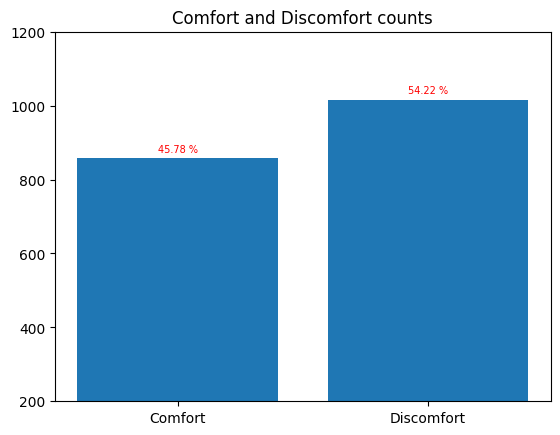

In [ ]:
categories= ['Comfort', 'Discomfort']
values = [comfort_data['pmv'].count(), sum(discomfort_data['pmv'].isna())]

fig, ax = plt.subplots()
bar_container = ax.bar(categories, values)
ax.set(title="Comfort and Discomfort counts", ylim=(200, 1200))
ax.bar_label(ax.containers[0], fmt=lambda x: f'{round((x*100)/data.shape[0],2)} %', label_type='edge', color='red', fontsize=7, padding=3)
plt.grid(False)
plt.show();

#### Based on the occupancy periods (morning, afternoon, evening)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


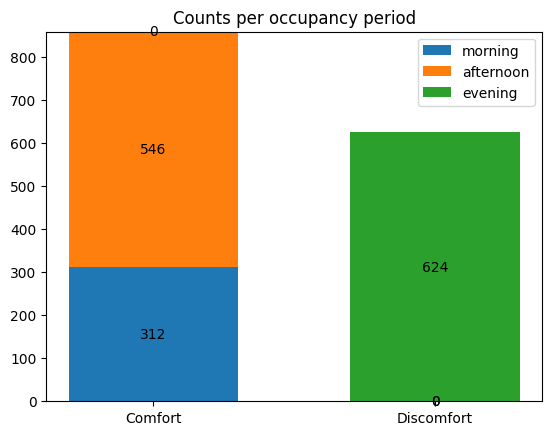

In [ ]:
# get occupancy periods' data
morning_data = data[(data['rec_hour'] >=6) & (data['rec_hour'] <= 9)]
afternoon_data = data[(data['rec_hour'] >=15) & (data['rec_hour'] < 22)]
evening_data = data[(data['rec_hour'] >=22) | (data['rec_hour'] < 6)]

# customize into a new datasource
value_counts = {
    'morning': np.array([morning_data['pmv'].count(), sum(morning_data['pmv'].isna())]),
    'afternoon': np.array([afternoon_data['pmv'].count(), sum(afternoon_data['pmv'].isna())]),
    'evening': np.array([evening_data['pmv'].count(), sum(evening_data['pmv'].isna())])
}

width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(2)

for cat, cat_count in value_counts.items():
    p = ax.bar(categories, cat_count, width, label=cat, bottom=bottom)
    bottom += cat_count

    ax.bar_label(p, label_type='center')

ax.set_title('Counts per occupancy period')
ax.legend()
fig.savefig('Counts_per_occupancy_period')
plt.show()

#### Q2. Which days had the highest discomfort during occupancy?

In [ ]:
# replace NAN with 'NAN'
discomfort_per_day = data[(data["pmv"].isna()) & ((data['rec_hour'] < 10) | (data['rec_hour'] > 14))][['rec_date', 'pmv']]
discomfort_per_day['pmv'].fillna('NAN', inplace= True)

# count discomfort obs per day
discomfort_per_day = discomfort_per_day.groupby(discomfort_per_day['rec_date']).count().reset_index()
discomfort_per_day

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rec_date,pmv
0,2024-05-08,12
1,2024-05-09,48
2,2024-05-10,48
3,2024-05-11,48
4,2024-05-12,48
5,2024-05-13,48
6,2024-05-14,48
7,2024-05-15,48
8,2024-05-16,48
9,2024-05-17,48


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


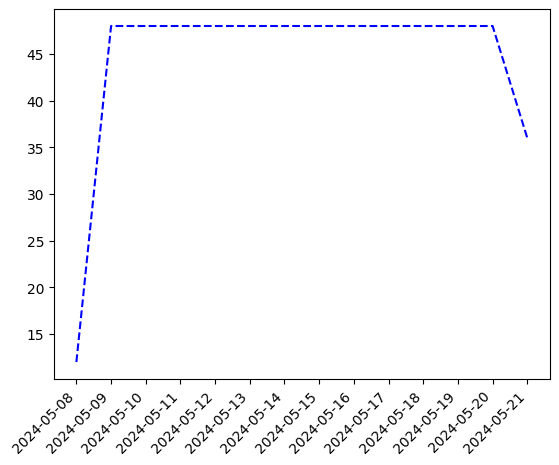

In [ ]:
# line plot x= rec_date and y = pmv counts
plt.plot(discomfort_per_day['rec_date'], discomfort_per_day['pmv'], 'b--')
plt.xticks(rotation=45, ha='right')
plt.title = ('Discomfort counts per day')
plt.show()

Q3. When did the thermal comfort violation occur mostly during occupancy (morning, afternoon, or evening time)?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


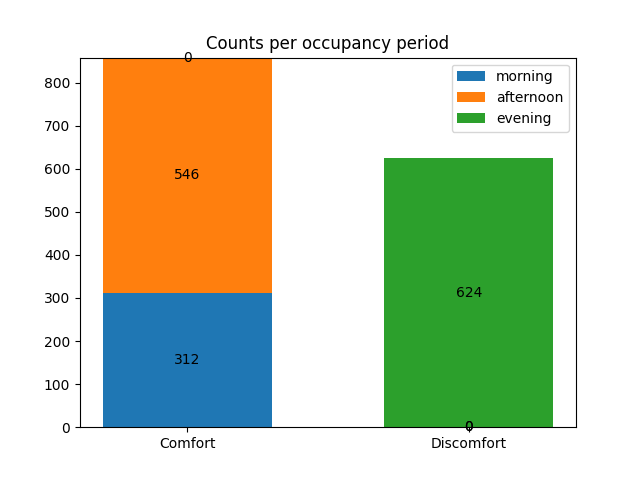

In [ ]:
from IPython.display import Image
Image('Counts_per_occupancy_period.png')

#### Q4. What are the ranges of temperatures and relative humidity that provided thermal comfort?

In [ ]:
# customize new data source
categories = ['morning', 'afternoon', 'evening']
temp_values = {
    'min': np.array([morning_data.temperature.min(), afternoon_data.temperature.min(), evening_data.temperature.min()]),
    'max': np.array([morning_data.temperature.max(), afternoon_data.temperature.max(), evening_data.temperature.max()])
}
rh_values = {
    'min': np.array([morning_data.rel_humidity.min(), afternoon_data.rel_humidity.min(), evening_data.rel_humidity.min()]),
    'max': np.array([morning_data.rel_humidity.max(), afternoon_data.rel_humidity.max(), evening_data.rel_humidity.max()])
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def temp_rh_plot_bars(data_values, ylabel, title, y_limit):
  """
  receive temp_values or rh_values
  """
  x = np.arange(len(categories))  # the label locations
  width = 0.25  # the width of the bars
  multiplier = 0

  fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

  for key, value in data_values.items():
      offset = width * multiplier
      rects = ax.bar(x + offset, value, width, label=key)
      ax.bar_label(rects, fontsize=7, padding=3)
      multiplier += 1

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  ax.set_xticks(x + width, categories)
  ax.legend(loc='upper left', ncols=2)
  ax.set_ylim(y_limit)

  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


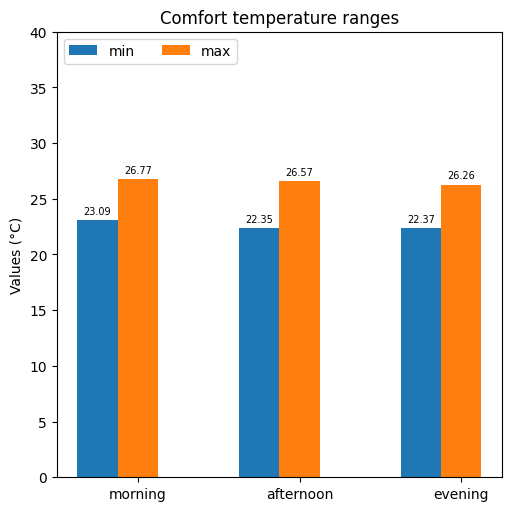

In [ ]:
# plot for temperatures
temp_rh_plot_bars(
    data_values=temp_values,
    ylabel = 'Values (°C)',
    title='Comfort temperature ranges',
    y_limit=(0, 40)
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


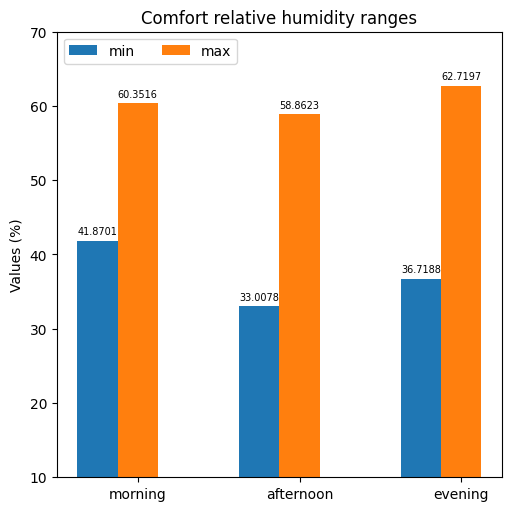

In [ ]:
# plot for relative humidity
temp_rh_plot_bars(
    data_values=rh_values,
    ylabel = 'Values (%)',
    title='Comfort relative humidity ranges',
    y_limit=(10, 70)
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


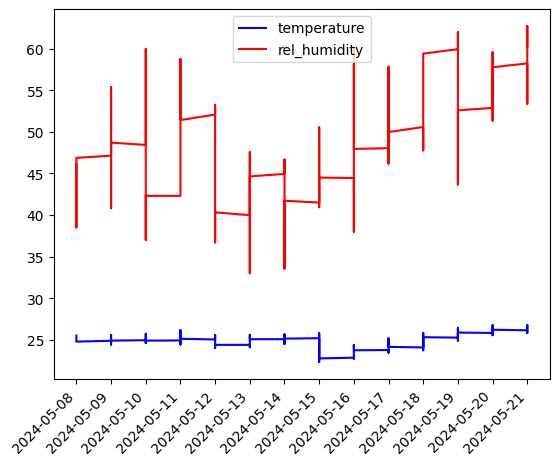

In [18]:
# T° values over recording time
plt.plot(data['rec_date'], data['temperature'], 'b')
plt.plot(data['rec_date'], data['rel_humidity'], 'r')
plt.xticks(rotation=45, ha='right')
plt.legend(data[['temperature', 'rel_humidity']])
plt.title = ('Temperature & Humidity over time')
plt.show()

## 4. Drawing conclusions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 5. Communinication

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
